In [88]:
import hypertools as hyp
import numpy as np
from scipy.spatial.distance import pdist, cdist
import seaborn as sns

%matplotlib inline

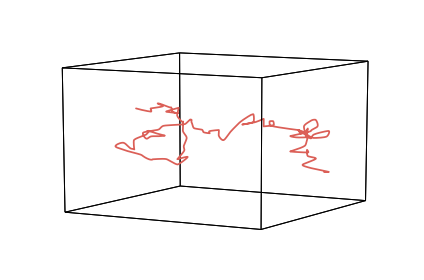

In [85]:
#make a fake dataset
T = 100
V = 10

data = np.cumsum(np.random.randn(T, V), axis=0)

hyp.plot(data);


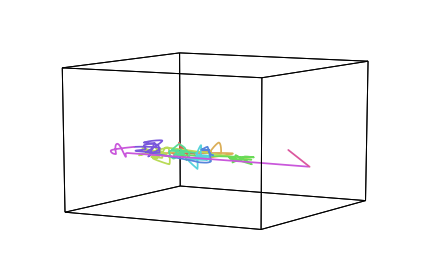

(<matplotlib.figure.Figure at 0x7fdfa813fa58>,
 [array([[  9.43748806e-01,   1.67501138e+00,   1.59720893e+00, ...,
           -2.13168061e+01,  -2.07074131e+01,  -2.10339923e+01],
         [ -1.05211104e-01,  -1.25951146e+00,  -2.13695632e+00, ...,
            3.60560956e+01,   3.57380263e+01,   3.63132484e+01],
         [ -1.34544486e+00,  -1.28114970e+00,  -2.43792098e+00, ...,
           -3.04243509e+01,  -3.13612359e+01,  -3.00837840e+01],
         ..., 
         [  1.79285091e-01,   2.09184952e-01,  -9.78816721e-01, ...,
            9.43154482e+01,   9.42314148e+01,   9.32471799e+01],
         [ -3.55181591e-01,  -1.04718411e-01,   7.73584806e-02, ...,
            4.12988302e+00,   3.52463065e+00,   2.97124609e+00],
         [  4.98517801e-01,   6.96053379e-01,  -4.29916747e-01, ...,
            1.35313167e+01,   1.19827669e+01,   1.32883257e+01]])],
 None)

In [26]:
labels = hyp.tools.cluster(data.T, n_clusters=10)
hyp.plot(data.T, group=labels)

In [70]:
def io_ratio(observations, group_labels):
    group_labels = np.array(group_labels)
    unique_groups = np.unique(group_labels)
    in_group = 0.0
    out_group = 0.0
    
    for g in unique_groups:
        if np.sum(group_labels == g) == 0:
            continue
        
        in_obs = np.array(observations[group_labels == g, :], ndmin=2)
        out_obs = np.array(observations[group_labels != g, :], ndmin=2)
        
        in_group += np.mean(pdist(in_obs))
        out_group += np.mean(cdist(in_obs, out_obs))
    
    return in_group / out_group


In [71]:
x = list(map(lambda k: io_ratio(data.T, hyp.tools.cluster(data.T, n_clusters=k)), np.arange(2, 11)))

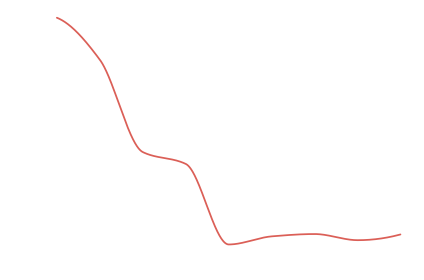

(<matplotlib.figure.Figure at 0x7fdfa88bf2b0>,
 [array([[ 0.54073182],
         [ 0.51646256],
         [ 0.46312544],
         [ 0.4562843 ],
         [ 0.40976593],
         [ 0.4144474 ],
         [ 0.41579023],
         [ 0.41224055],
         [ 0.41558107]])],
 None)

In [83]:
def dynamic_kmeans(observations, minK, maxK, n, statfun=io_ratio):
    '''
    observations: T by V numpy array of observations
    minK, maxK: minimum and maximum values of K to use
    n: number of timepoints
    statfun: takes in an observations matrix and cluster labels; returns a clustering stat
    '''
    
    stats = np.zeros([observations.shape[0] - n + 1, maxK - minK])
    for t in np.arange(stats.shape[0]):
        next_obs = observations[t:(t+n), :]
        stats[t, :] = np.array(list(map(lambda k: statfun(next_obs.T, hyp.tools.cluster(next_obs.T, n_clusters=k)),
                                   np.arange(minK, maxK))))
    return stats

In [86]:
stats = dynamic_kmeans(data, 1, 5, 10)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [87]:
stats.shape

(91, 4)

/opt/conda/lib/python3.6/site-packages/hypertools/tools/reduce.py:118: UserWarning: Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)
  warnings.warn('Missing data: Inexact solution computed with PPCA (see https://github.com/allentran/pca-magic for details)')


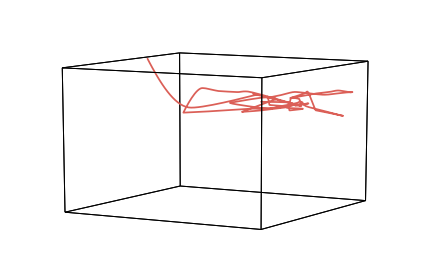

(<matplotlib.figure.Figure at 0x7fdf93caa278>,
 [array([[        nan,  0.61193483,  0.44608285,  0.473275  ],
         [        nan,  0.52932075,  0.42977627,         nan],
         [        nan,  0.49483228,         nan,         nan],
         [        nan,  0.4929783 ,         nan,         nan],
         [        nan,  0.5110092 ,         nan,         nan],
         [        nan,  0.31294769,         nan,         nan],
         [        nan,  0.31113089,         nan,         nan],
         [        nan,  0.29872476,         nan,         nan],
         [        nan,  0.28351009,         nan,         nan],
         [        nan,  0.29142365,         nan,         nan],
         [        nan,  0.31891644,  0.37965578,  0.37897285],
         [        nan,  0.34583752,  0.39015575,  0.37630639],
         [        nan,  0.38139779,  0.40801719,  0.38024493],
         [        nan,  0.41034876,  0.42978106,  0.39522907],
         [        nan,  0.49617816,  0.45774478,         nan],
        

In [90]:
hyp.plot(stats)